# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [303]:
import pandas as pd
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tabulate import tabulate


In [24]:
# Load the datasets
cast =pd.read_csv('/Users/sundeepravichander/OIM7502_F25/cast.csv')
titles = pd.read_csv('/Users/sundeepravichander/OIM7502_F25/titles.csv')
releases = pd.read_csv('/Users/sundeepravichander/OIM7502_F25/release_dates.csv')

# Convert 'date' to datetime objects in release_dates for later use
releases['date'] = pd.to_datetime(releases['date'])

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [30]:
print("Tite Details")
print("---------------------------------")
print(titles.info())
print(f"Number of records: {len(titles)}")

print("Cast Details")
print("---------------------------------")
print(cast.info())
print(f"Number of records: {len(cast)}")

print("Release Date Details ")
print("---------------------------------")
print(releases.info())
print(f"Number of records: {len(releases)}")



Tite Details
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None
Number of records: 226013
Cast Details
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None
Number of records: 3442902
Release Date Details 
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 

### 2. How many movies have the title North by Northwest

In [34]:
northbynorthwestern_title = titles[titles['title'] == 'North by Northwest'].shape[0]
print("Count of Movies with the title 'North by Northwest': {northbynorthwestern_title}")

Count of Movies with the title 'North by Northwest': {northbynorthwestern_title}


### 3. How many version of Hamlet are there, when was the first made? the last?

In [38]:
hamlet_name = titles[titles['title'] == 'Hamlet']
hamlet_count = hamlet_name.shape[0]
hamlet_first = hamlet_name['year'].min()
hamlet_last = hamlet_name['year'].max()

print(f"Number of versions of 'Hamlet': {hamlet_count}")
print(f"Year of the first 'Hamlet': {hamlet_first}")
print(f"Year of the last 'Hamlet': {hamlet_last}")

Number of versions of 'Hamlet': 20
Year of the first 'Hamlet': 1910
Year of the last 'Hamlet': 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [68]:
# Sort by release year (ascending)
treasure_island = df_titles[df_titles['title'].str.lower() == 'treasure island'].sort_values('year')


# Display the results
print(tabulate(treasure_island, headers='keys', tablefmt='table', showindex=False))

title              year
---------------  ------
Treasure Island    1918
Treasure Island    1920
Treasure Island    1934
Treasure Island    1950
Treasure Island    1972
Treasure Island    1973
Treasure Island    1985
Treasure Island    1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [83]:
mov_1950 = titles[titles['year'] == 1950].shape[0]
mov_1980 = titles[titles['year'] == 1980].shape[0]
mov_2000 = titles[titles['year'] == 2000].shape[0]

print(f"Movies made in 1950: {mov_1950}")
print(f"Movies made in 1980: {mov_1980}")
print(f"Movies made in 2000: {mov_2000}")

Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


 From the data abovew it is clear that  there is a positive trend in the production of movies.This indicates that the Film Industry is growing. It highlights how  the technological innovation, and other factors helped transformed filmmaking from an elite industry into a widespread creative medium accessible to the entire world.          

### 6. How big was the cast of Metropolis


In [89]:
# Filter for the movie Metropolis
metropolis_cast = cast[cast['title'].str.lower() == 'metropolis']

# Count of actors  listed
cast_size = metropolis_cast.shape[0]

print(f"The movie 'Metropolis' has a cast of {cast_size} members.")

The movie 'Metropolis' has a cast of 33 members.


### 7. How many roles for actors were there 1950's? 1990's

In [91]:
# Count roles for each decade
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960)].shape[0]
roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)].shape[0]

print(f"Roles in 1950s: {roles_1950s}")
print(f"Roles in 1990s: {roles_1990s}")

Roles in 1950s: 209890
Roles in 1990s: 361218


### 8. How many roles for actors & actresses over time? Output should be a line graph

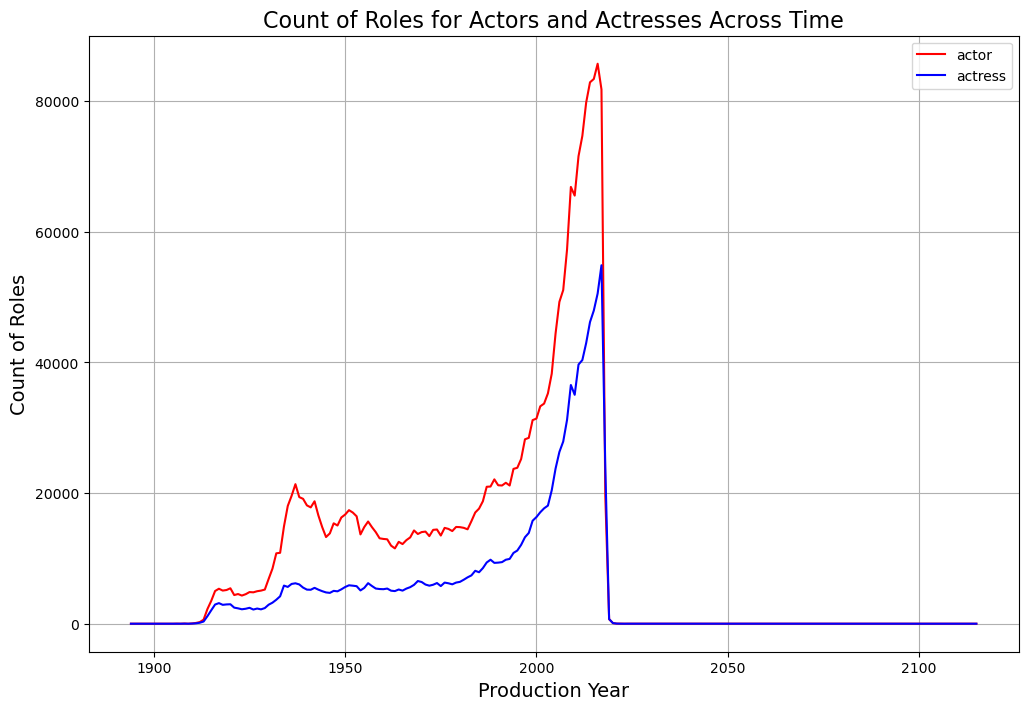

In [130]:
# Group by year and type, then unstack to separate 'actor' and 'actress' into columns
roles_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

roles_year.plot(figsize=(12,8), color=['red', 'blue'])
plt.title('Count of Roles for Actors and Actresses Across Time', fontsize=16)
plt.xlabel('Production Year', fontsize=14)
plt.ylabel('Count of Roles', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [132]:
# Filter for years 2000–2009 and leading roles (n == 1)
leading_roles_2000s = cast[
    (cast["year"] >= 2000) & 
    (cast["year"] <= 2009) & 
    (cast["n"] == 1.0)
]

# Count the number of leading roles
leading_roles_2000s_count = len(leading_roles_2000s)

print("Number of leading roles in the 2000s:", leading_roles_2000s_count)

Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [140]:
no_rank_1950s = cast[(cast["year"] >= 1950) & (cast["year"] <= 1959) & (cast["n"].isna())]
no_rank_2000s = cast[(cast["year"] >= 2000) & (cast["year"] <= 2009) & (cast["n"].isna())]

# Count 
count_1950s = len(no_rank_1950s)
count_2000s = len(no_rank_2000s)

print(f"Unranked roles in 1950s: {count_1950s}")
print(f"Unranked roles in 2000s: {count_2000s}")

Unranked roles in 1950s: 95406
Unranked roles in 2000s: 232037


In the 1950s, there were about 95,000 unranked roles, when compared to  the 2000s that number had increased to over 230,000..

The rise doesn’t mean actors were less likely to be credited — it could reflect:

Growth of the film and television industry.

Better data collection and digital record-keeping.

Inclusion of extras, background actors, and uncredited roles in modern databases.

The increase in unranked roles shows how the industry became larger, more inclusive, and better documented over time.

### 11. Plot the number of films made in each decade

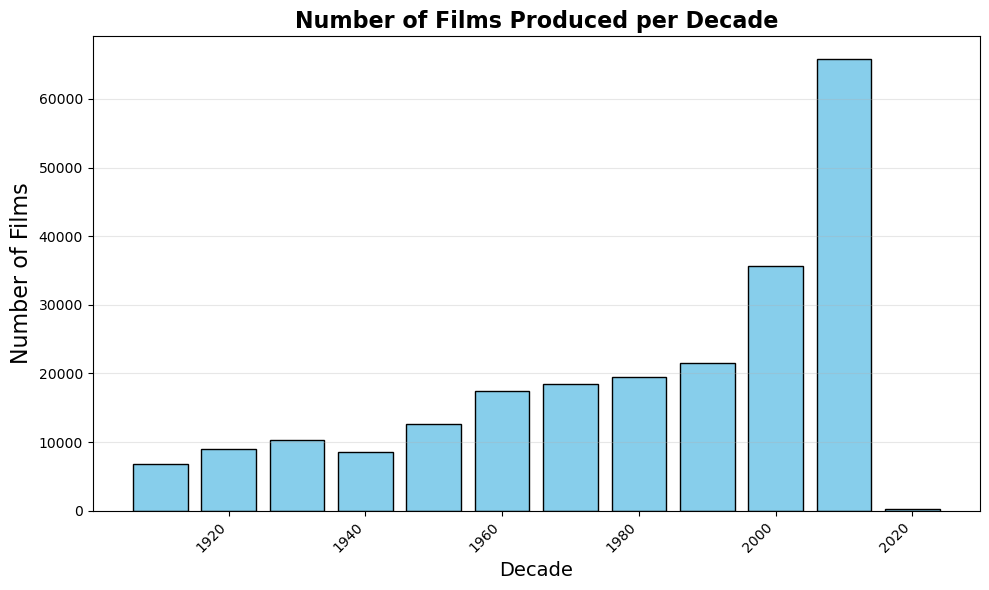

In [187]:
titles["decade"] = (titles["year"] // 10) * 10

titles = titles.dropna(subset=["year"])


#Group by decade and count number of films

films_per_decade = titles.groupby("decade").size().reset_index(name="count")

# Filter out small counts (optional)
films_per_decade = films_per_decade[films_per_decade["count"] > 100]

# Plot the data
plt.figure(figsize=(10,6))
plt.bar(films_per_decade["decade"], films_per_decade["count"], width=8, color="skyblue", edgecolor="black")
plt.title("Number of Films Produced per Decade", fontsize=16, weight="bold")
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Number of Films", fontsize=16)
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 12. Plot the number of films with a Rustler character over time

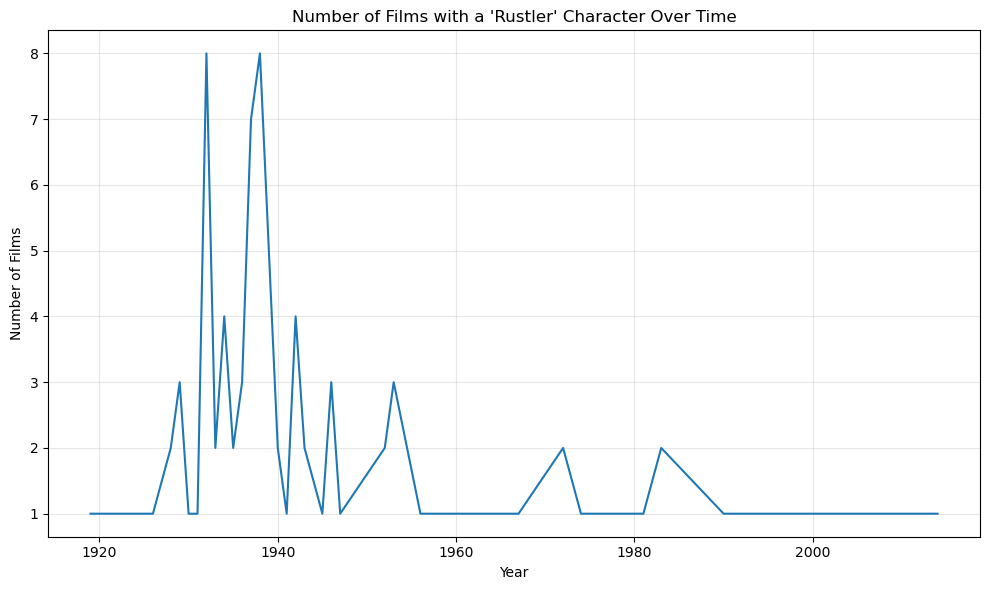

In [191]:

rustlers = cast[cast["character"].astype(str).str.contains(r"rustler", case=False, na=False)]

# Avoid double-counting the same film/year if multiple "Rustler" roles exist
rustler_titles = rustlers.drop_duplicates(subset=["title", "year"])


# Count films per year
counts = rustler_titles.groupby("year").size().reset_index(name="num_films")

# Plot
plt.figure(figsize=(10,6))
plt.plot(counts["year"], counts["num_films"])
plt.title("Number of Films with a 'Rustler' Character Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 13. What are the top ten character names of all time?

In [229]:
# Get top 10 character names
topten_chars = cast['character'].value_counts().head(10).reset_index()

# Rename columns 
topten_chars.columns = ['Character', 'Count']

# Display as a formatted table
print(tabulate(topten_chars, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤═════════╕
│ Character   │   Count │
╞═════════════╪═════════╡
│ Himself     │   19637 │
├─────────────┼─────────┤
│ Dancer      │   12019 │
├─────────────┼─────────┤
│ Extra       │   10848 │
├─────────────┼─────────┤
│ Reporter    │    7818 │
├─────────────┼─────────┤
│ Doctor      │    6963 │
├─────────────┼─────────┤
│ Party Guest │    6786 │
├─────────────┼─────────┤
│ Student     │    6631 │
├─────────────┼─────────┤
│ Policeman   │    6424 │
├─────────────┼─────────┤
│ Bartender   │    6290 │
├─────────────┼─────────┤
│ Herself     │    6269 │
╘═════════════╧═════════╛


### 14. Which actor appeared in the most films in the 1990's decade?

In [247]:
cast_1990s = cast[(cast["year"] >= 1990) & (cast["year"] <= 1999)]

# Count how many films each actor appeared in
actor_counts = cast_1990s["name"].value_counts()

# Get the top actor
top_actor_name = actor_counts.index[0]
top_actor_count = actor_counts.iloc[0]

# Print
print(f"The actor who appeared in the most films in the 1990s is {top_actor_name} with {top_actor_count} films.")


The actor who appeared in the most films in the 1990s is Shakti Kapoor with 143 films.


### 15. What are the top 10 roles that start with Science?

In [261]:
from tabulate import tabulate
import pandas as pd

# Filter roles starting with "Science"
science_roles = cast[cast["character"].astype(str).str.startswith("Science", na=False)]

# Count occurrences and get top 10
top10_science_roles = science_roles["character"].value_counts().head(10).reset_index()

# Rename columns
top10_science_roles.columns = ["Character", "Count"]

# Print 
print("Top 10 Roles That Start with 'Science':\n")
print(tabulate(top10_science_roles, headers='keys', tablefmt='fancy_grid', showindex=False))


Top 10 Roles That Start with 'Science':

╒══════════════════════╤═════════╕
│ Character            │   Count │
╞══════════════════════╪═════════╡
│ Science Teacher      │      57 │
├──────────────────────┼─────────┤
│ Science Fair Student │       9 │
├──────────────────────┼─────────┤
│ Science Student      │       6 │
├──────────────────────┼─────────┤
│ Science Fair Judge   │       6 │
├──────────────────────┼─────────┤
│ Science Kid          │       5 │
├──────────────────────┼─────────┤
│ Science Fair Kid     │       5 │
├──────────────────────┼─────────┤
│ Science Reporter     │       5 │
├──────────────────────┼─────────┤
│ Science              │       4 │
├──────────────────────┼─────────┤
│ Science Officer      │       3 │
├──────────────────────┼─────────┤
│ Science teacher      │       3 │
╘══════════════════════╧═════════╛


### 16. What film has the largest cast

In [265]:
# Group by film title and count the number of cast members
cast_count = cast.groupby("title")["name"].nunique().reset_index(name="cast_size")

# Find the film with the largest cast
largest_cast_film = cast_count.loc[cast_count["cast_size"].idxmax()]

# Print 
print(f"The film with the largest cast is '{largest_cast_film['title']}' with {largest_cast_film['cast_size']} cast members.")

The film with the largest cast is 'Around the World in 80 Days' with 1363 cast members.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [282]:
# Group by title and year, count number of cast members per film
cast_count = cast.groupby(['title', 'year']).size().reset_index(name="cast_size")

# Generate descriptive statistics
desc_stats = cast_count["cast_size"].describe()

# Display results
print("Descriptive Statistics for Cast Size:\n")
print(desc_stats)


Descriptive Statistics for Cast Size:

count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
Name: cast_size, dtype: float64


Looking across more than 180,000 films, the typical movie features around 13 cast members, though the average climbs to about 19. That gap tells us most films are made with smaller, focused casts, while a few very large productions push the numbers higher.

Some epic movies list hundreds or even over a thousand credited performers, likely due to crowd scenes or ensemble storytelling. These rare cases stretch the upper range and make the data quite uneven, with most films on the smaller side and a handful of blockbusters standing far apart.

In short, the film world is mostly built on intimate casts, but it’s the occasional grand production that reminds us how vast cinema can be.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [287]:
natalie_portman = cast[cast["name"] == "Natalie Portman"]

# Count unique films per year
films_per_year = (
    natalie_portman.groupby("year")["title"]
    .nunique()
    .reset_index(name="Number of Films")
    .sort_values("year")
)
# Print 
print("Number of Films by Natalie Portman per Year:\n")
print(tabulate(films_per_year, headers='keys', tablefmt='fancy_grid', showindex=False))

Number of Films by Natalie Portman per Year:

╒════════╤═══════════════════╕
│   year │   Number of Films │
╞════════╪═══════════════════╡
│   1995 │                 1 │
├────────┼───────────────────┤
│   1996 │                 3 │
├────────┼───────────────────┤
│   1999 │                 2 │
├────────┼───────────────────┤
│   2000 │                 1 │
├────────┼───────────────────┤
│   2001 │                 1 │
├────────┼───────────────────┤
│   2002 │                 1 │
├────────┼───────────────────┤
│   2003 │                 1 │
├────────┼───────────────────┤
│   2004 │                 2 │
├────────┼───────────────────┤
│   2005 │                 4 │
├────────┼───────────────────┤
│   2006 │                 1 │
├────────┼───────────────────┤
│   2007 │                 3 │
├────────┼───────────────────┤
│   2008 │                 1 │
├────────┼───────────────────┤
│   2009 │                 2 │
├────────┼───────────────────┤
│   2010 │                 3 │
├────────┼──────────────

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [297]:
natalie_lead = cast[
    (cast["name"] == "Natalie Portman") &
    (cast["n"].isin([1, 2]))
]

# Count unique films per year
films_per_year = (
    natalie_lead.groupby("year")["title"]
    .nunique()
    .reset_index(name="Film Count")
    .sort_values("year")
)
print(tabulate(films_per_year, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤══════════════╕
│   year │   Film Count │
╞════════╪══════════════╡
│   1999 │            1 │
├────────┼──────────────┤
│   2000 │            1 │
├────────┼──────────────┤
│   2002 │            1 │
├────────┼──────────────┤
│   2005 │            3 │
├────────┼──────────────┤
│   2006 │            1 │
├────────┼──────────────┤
│   2007 │            1 │
├────────┼──────────────┤
│   2008 │            1 │
├────────┼──────────────┤
│   2009 │            1 │
├────────┼──────────────┤
│   2010 │            1 │
├────────┼──────────────┤
│   2011 │            2 │
├────────┼──────────────┤
│   2013 │            1 │
├────────┼──────────────┤
│   2015 │            2 │
├────────┼──────────────┤
│   2016 │            2 │
╘════════╧══════════════╛


### 20. Determine how many roles for actor or actress by decade. Plot the output 

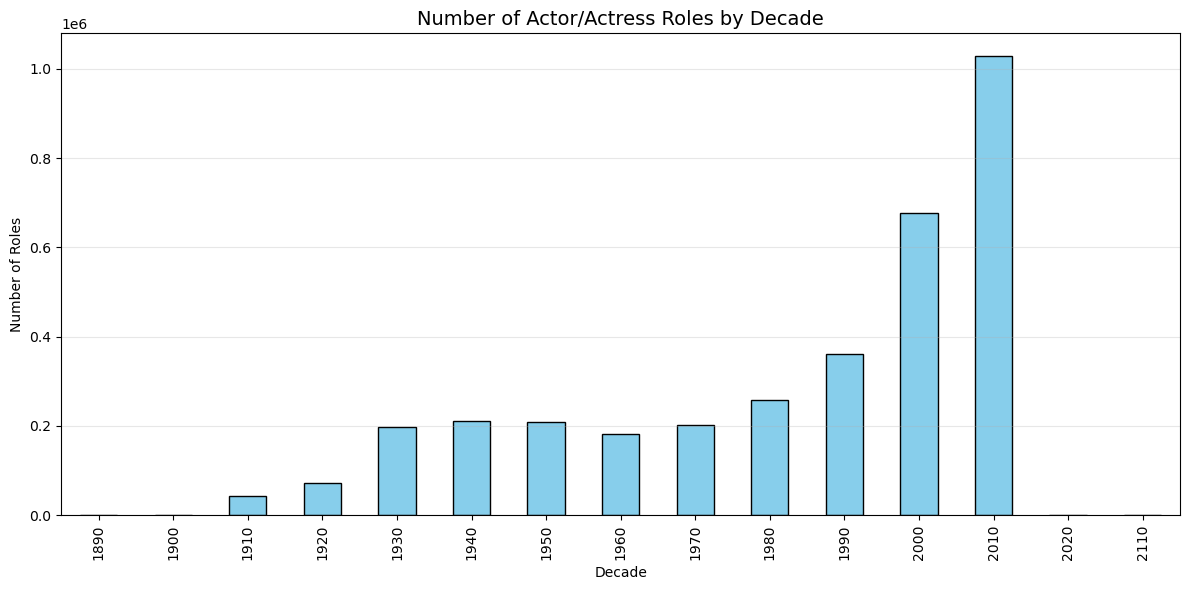

In [333]:

#Keep only actors and actresses
actors = cast[cast["type"].isin(["actor", "actress"])]

# Create decade column
actors["decade"] = (actors["year"] // 10) * 10

# Count roles by decade
roles_by_decade = actors.groupby("decade").size()


# Plot
roles_by_decade.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(12,6))
plt.title("Number of Actor/Actress Roles by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Number of Roles")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [349]:
release_dates = pd.read_csv('/Users/sundeepravichander/OIM7502_F25/release_dates.csv')

# Convert date column to datetime format
release_dates["date"] = pd.to_datetime(releases["date"], errors="coerce")

# Extract day of week and month name
release_dates["day_of_week"] = release_dates["date"].dt.day_name()
release_dates["month"] = release_dates["date"].dt.month_name()

# Create a pivot table showing number of releases by day of week and month
release_pivot = pd.pivot_table(
    release_dates,
    index="day_of_week",
    columns="month",
    values="title",
    aggfunc="count",
    fill_value=0
)

# Reorder days for readability
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
release_pivot = release_pivot.reindex(day_order)

# Display neatly
print("Movie Releases by Day of Week and Month:\n")
print(release_pivot)


Movie Releases by Day of Week and Month:

month        April  August  December  February  January   July   June  March  \
day_of_week                                                                    
Monday        3168    2844      3240      3138     3699   2267   2337   3383   
Tuesday       1446    1121      1903      1190     1823   1144   1179   1313   
Wednesday     4650    4270      5097      4118     4663   4243   4282   4479   
Thursday     10625    9931     10666     10356    10746   8947   9469  11844   
Friday       13559   13430     13020     13833    13734  11635  11997  15268   
Saturday      2868    2277      3357      2395     2925   2291   2409   2742   
Sunday        1358    1138      1813      1277     1822    894   1031   1228   

month          May  November  October  September  
day_of_week                                       
Monday        3050      3372     3551       3161  
Tuesday       1377      1415     1542       1309  
Wednesday     4289      4582     

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

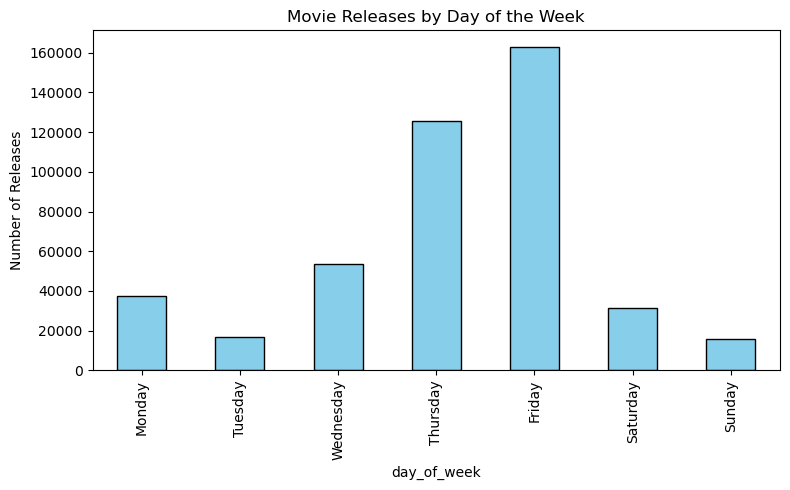

In [357]:
release_by_day = (release_dates["day_of_week"]
                  .value_counts()
                  .reindex(day_order, fill_value=0))

release_by_day.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(8,5))
plt.title("Movie Releases by Day of the Week")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [371]:
# Find all actors who appeared in any Star Wars film
star_wars_actors = cast[cast["title"].str.contains("Star Wars", case=False, na=False)]["name"].unique()

# Get all films those actors appeared 
films_with_star_wars_actors = cast[
    (cast["name"].isin(star_wars_actors)) &
    (~cast["title"].str.contains("Star Wars", case=False, na=False))
]

# Show  results
print("Films featuring Star Wars actors (excluding Star Wars):\n")
print(films_with_star_wars_actors[["name", "title", "year"]].drop_duplicates().sort_values(["name", "year"]).head(50))


Films featuring Star Wars actors (excluding Star Wars):

                       name  \
1076731  Aaron (IV) Kennedy   
1076732  Aaron (IV) Kennedy   
124861         Adam Bareham   
572279          Adam Driver   
572275          Adam Driver   
572276          Adam Driver   
572280          Adam Driver   
572283          Adam Driver   
572274          Adam Driver   
572278          Adam Driver   
572287          Adam Driver   
572292          Adam Driver   
572277          Adam Driver   
572290          Adam Driver   
572293          Adam Driver   
572282          Adam Driver   
572284          Adam Driver   
572285          Adam Driver   
572281          Adam Driver   
572289          Adam Driver   
572288          Adam Driver   
572291          Adam Driver   
35996          Adrian Allan   
36001          Adrian Allan   
35995          Adrian Allan   
35998          Adrian Allan   
35999          Adrian Allan   
178497           Ahmed Best   
178499           Ahmed Best   
178498       